In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import os
from sklearn import preprocessing
import re
from scipy.stats import poisson

In [5]:
os.getcwd()

'C:\\Users\\SAGAR\\Downloads'

In [6]:
df1=pd.read_csv('leetcode.csv')
df1

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1821,Find Customers With Positive Revenue this Year,SQL Schema,1,Easy,NaN,88.9,0.0,https://leetcode.com/problems/find-customers-w...,15,305,343,Google,NaN,2,2,50,1,NaN
1821,1822,Sign of the Product of an Array,There is a function `signFunc(x)` that returns...,0,Easy,NaN,67.8,0.0,https://leetcode.com/problems/sign-of-the-prod...,104,7.9K,11.7K,Microsoft,Math,37,4,90,0,NaN
1822,1823,Find the Winner of the Circular Game,There are `n` friends that are playing a game....,0,Medium,NaN,71.8,0.0,https://leetcode.com/problems/find-the-winner-...,135,6.8K,9.5K,Bloomberg,Array,81,4,95,0,NaN
1823,1824,Minimum Sideway Jumps,There is a 3 lane road of length `n` that cons...,0,Medium,NaN,47.2,0.0,https://leetcode.com/problems/minimum-sideway-...,134,5K,10.7K,Pony.ai,"Dynamic Programming,Breadth-first Search",147,8,95,0,"[Frog Jump, /problems/frog-jump/, Hard]"


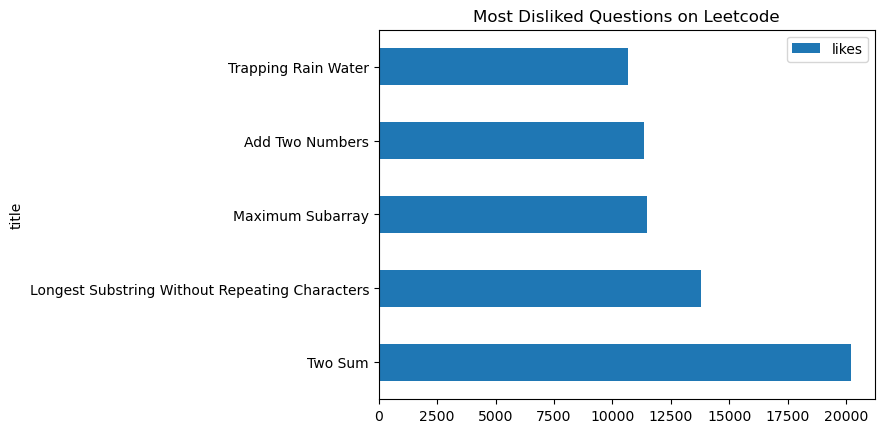

In [12]:
LikedQs = df1[["title","likes"]]
LikedQs = LikedQs.sort_values(by=["likes"],ascending=False).head()
LikedQs.plot.barh(x="title",y="likes",title="Most Disliked Questions on Leetcode")
plt.show()

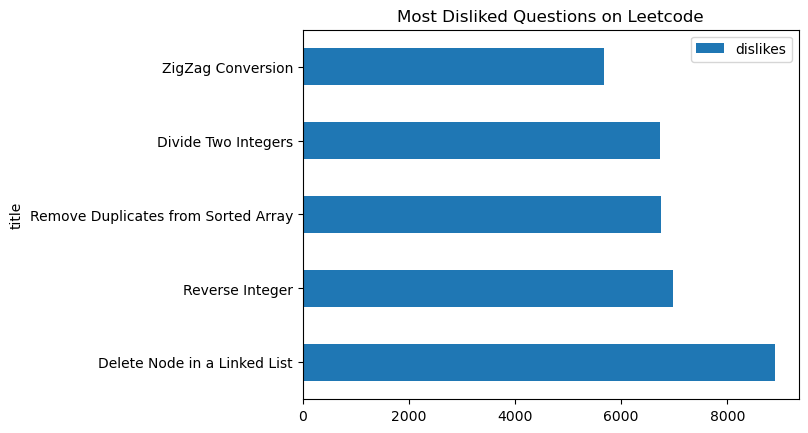

In [14]:
LikedQs = df1[["title","dislikes"]]
LikedQs = LikedQs.sort_values(by=["dislikes"],ascending=False).head()
LikedQs.plot.barh(x="title",y="dislikes",title="Most Disliked Questions on Leetcode");
plt.show()

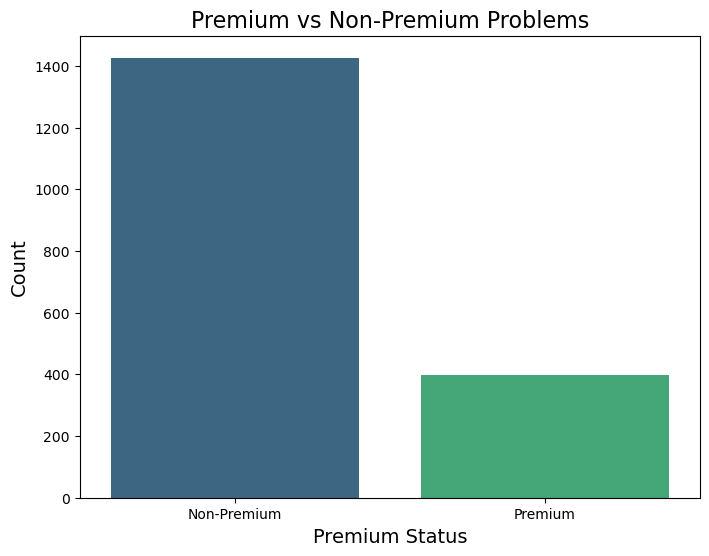

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='is_premium', palette='viridis')
plt.title('Premium vs Non-Premium Problems', fontsize=16)
plt.xlabel('Premium Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non-Premium', 'Premium'])
plt.savefig('premium_vs_non_premium.png', dpi=550)
plt.show()

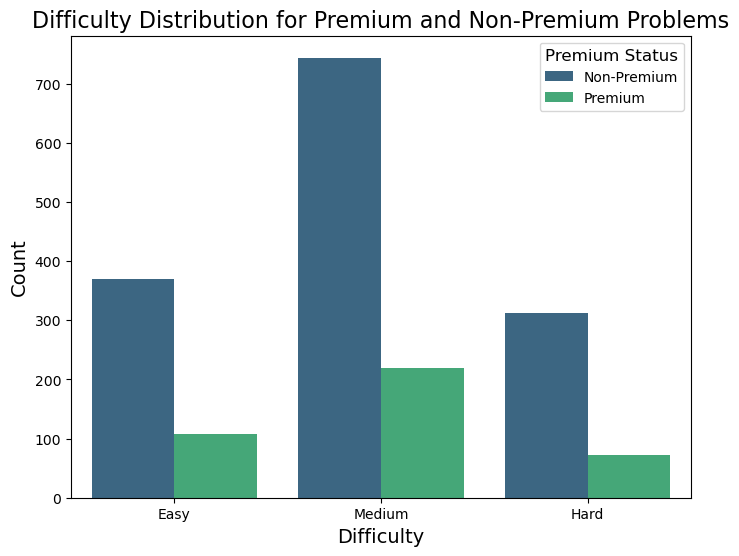

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='difficulty', hue='is_premium', palette='viridis')
plt.title('Difficulty Distribution for Premium and Non-Premium Problems', fontsize=16)
plt.xlabel('Difficulty', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Premium Status', title_fontsize=12, labels=['Non-Premium', 'Premium'])
plt.savefig('difficulty_distribution_premium_vs_non_premium.png', dpi=550)
plt.show()

In [6]:
df_com_topic=df1[['companies','related_topics']];
list_comp_topic=df_com_topic.values.tolist();

all_company_data = {};

def topic_count(company,topics,company_dic):
  
  if pd.isna(topics):
    return company_dic;
  for topic in topics.lower().split(','):
    if topic in company_dic:
      company_dic[topic]+=1;
    else:
      company_dic[topic]=1;
  return company_dic;

for  companies,topics in list_comp_topic:
  
  if pd.isna(companies):
    continue;
  for company in companies.lower().split(','):
    if company in all_company_data:
      all_company_data[company]=topic_count(company,topics,all_company_data[company]);
    else:
      all_company_data[company]={};

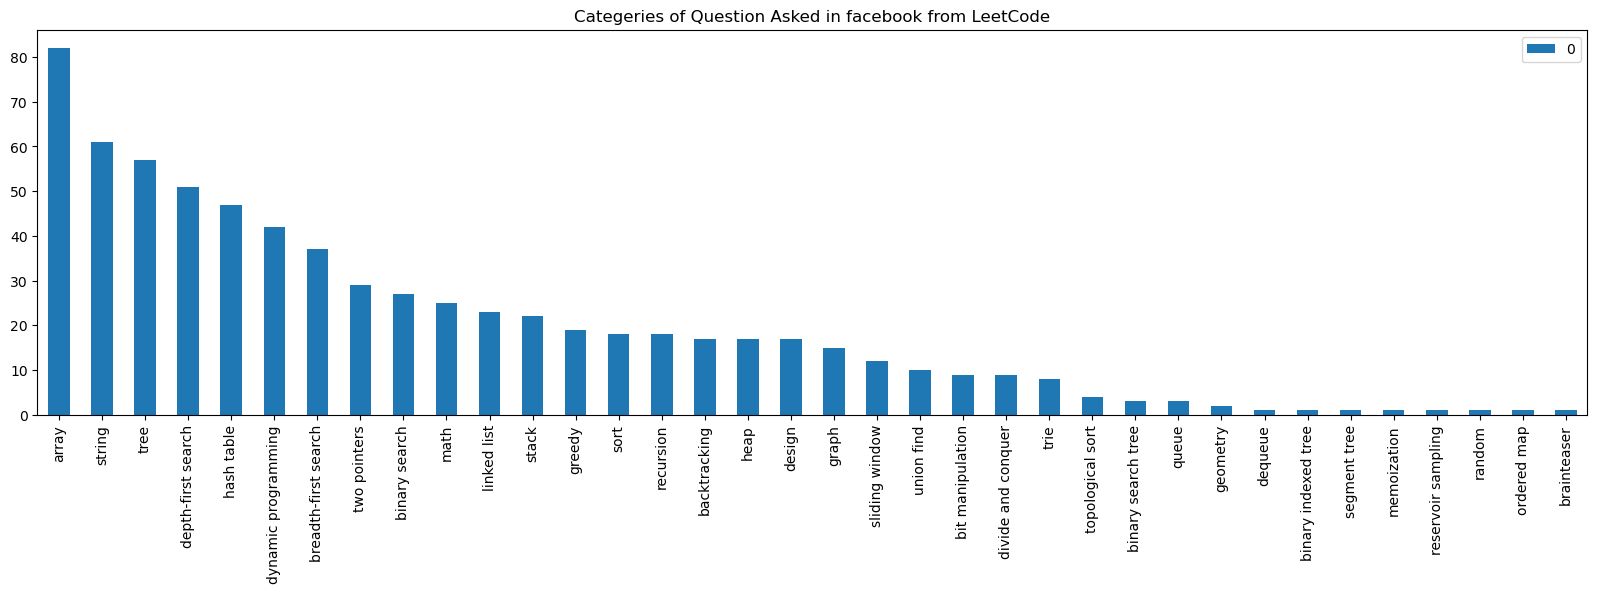

In [9]:

df_company=pd.DataFrame.from_dict(all_company_data['facebook'],orient ='index');
df_company=df_company.sort_values(by=[0],ascending=False)
df_company.plot.bar(figsize=(20, 5),title='Categeries of Question Asked in facebook from LeetCode');
plt.savefig('facebook.png')

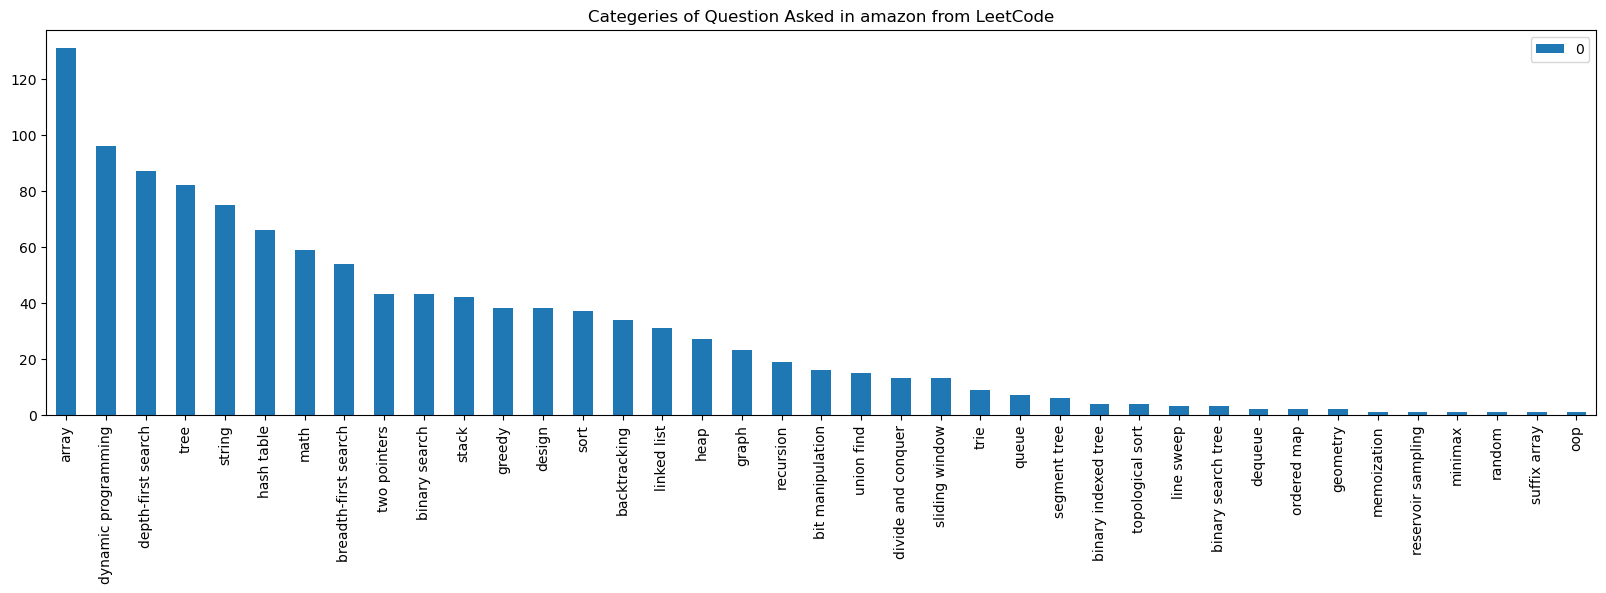

In [10]:
df_company=pd.DataFrame.from_dict(all_company_data['amazon'],orient ='index');
df_company=df_company.sort_values(by=[0],ascending=False)
df_company.plot.bar(figsize=(20, 5),title='Categeries of Question Asked in amazon from LeetCode');
plt.savefig('amazon.png')

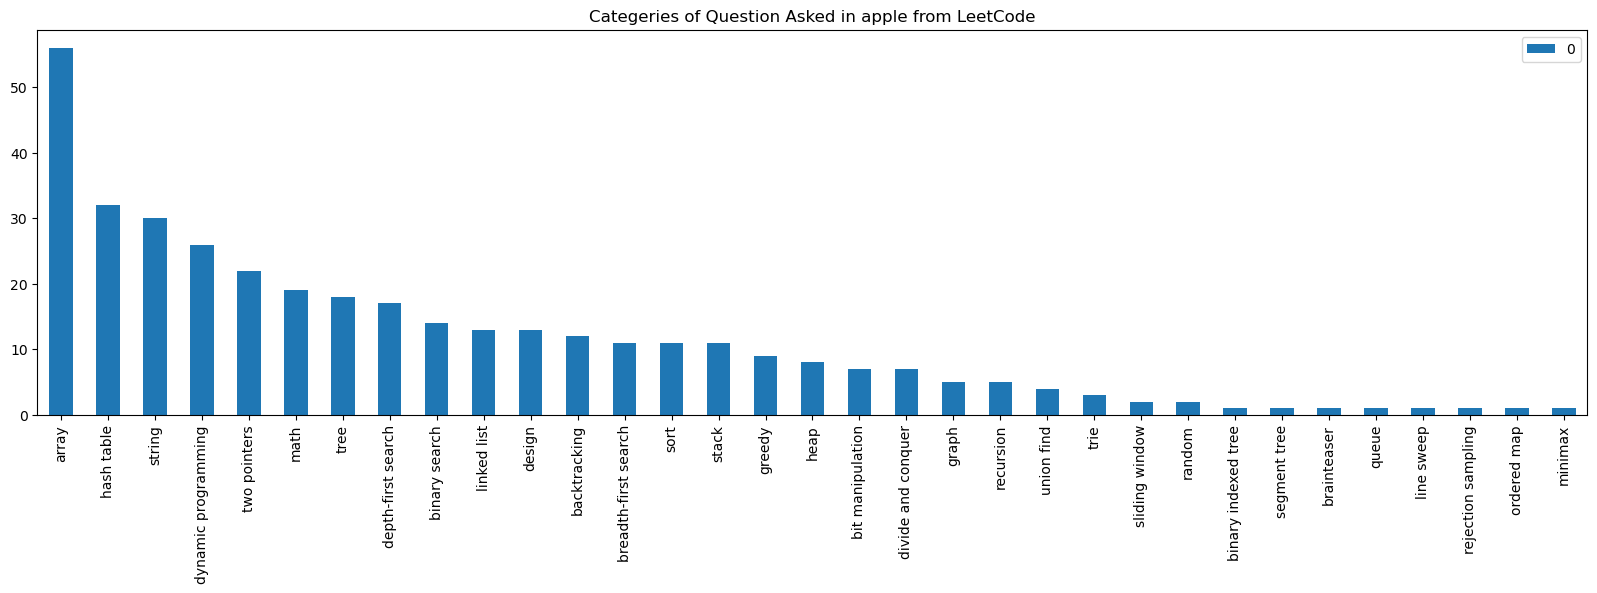

In [11]:
df_company=pd.DataFrame.from_dict(all_company_data['apple'],orient ='index');
df_company=df_company.sort_values(by=[0],ascending=False)
df_company.plot.bar(figsize=(20, 5),title='Categeries of Question Asked in apple from LeetCode');
plt.savefig('apple.png')

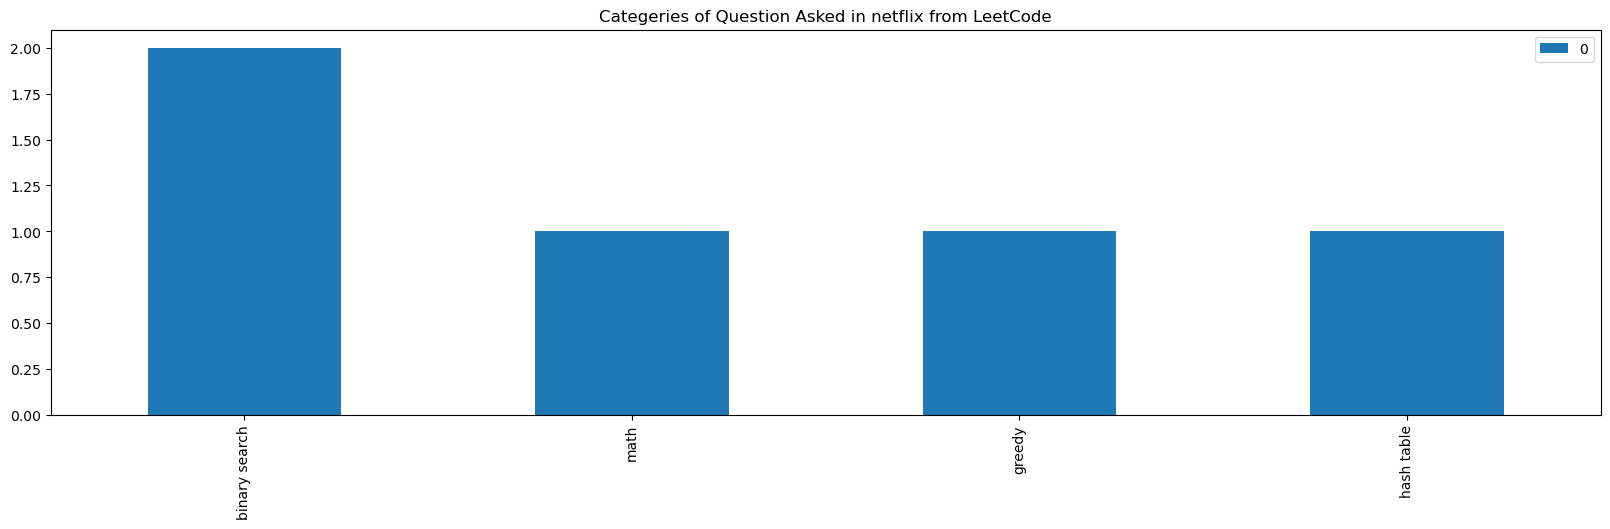

In [12]:
df_company=pd.DataFrame.from_dict(all_company_data['netflix'],orient ='index');
df_company=df_company.sort_values(by=[0],ascending=False)
df_company.plot.bar(figsize=(20, 5),title='Categeries of Question Asked in netflix from LeetCode');
plt.savefig('netflix.png')

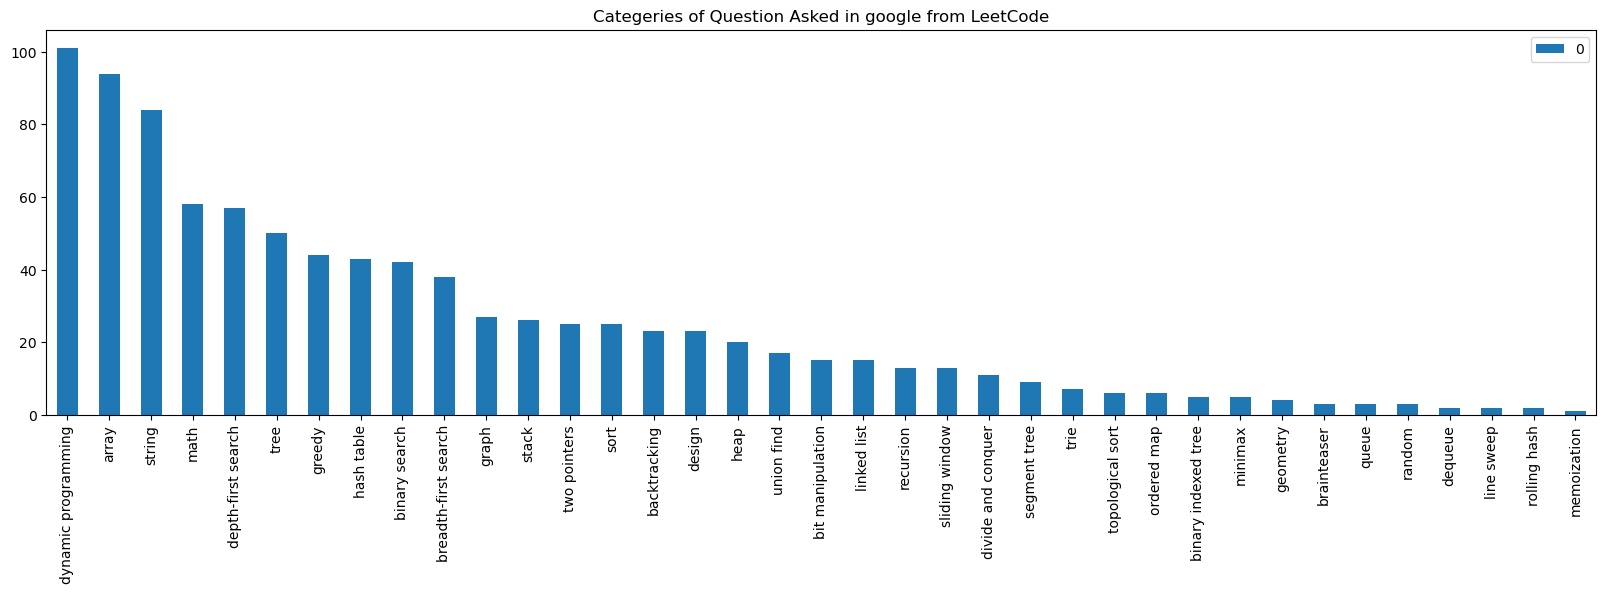

In [13]:
df_company=pd.DataFrame.from_dict(all_company_data['google'],orient ='index');
df_company=df_company.sort_values(by=[0],ascending=False)
df_company.plot.bar(figsize=(20, 5),title='Categeries of Question Asked in google from LeetCode');
plt.savefig('google.png')

In [42]:
print(len(df1))

1825


1225
1825
0.6712328767123288
[0.00030121 0.00276736 0.01506675 0.05383224 0.13188899 0.22439447
 0.26179354 0.20043568 0.09093841 0.01856659]


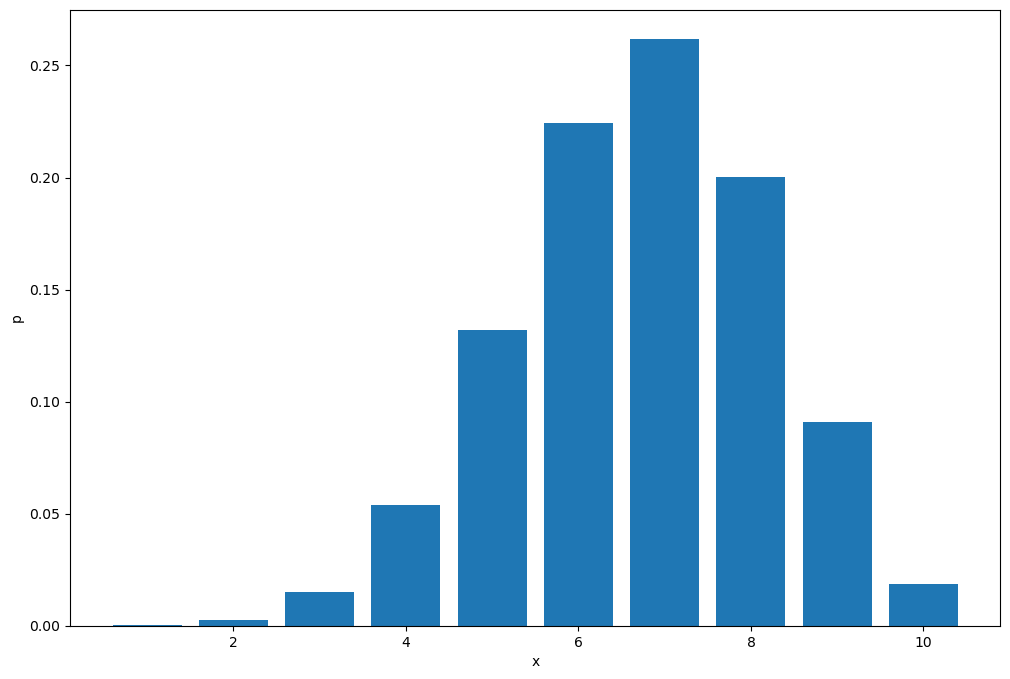

In [23]:
#Binomial PRobability Distribution
column=df1['asked_by_faang']
count=column[column==1].count()
print(count)
a=len(df1)
print(a)
p = count/a
print(p)
n=10
x =np.arange(1,11)
fig, ax = plt.subplots(figsize=(12,8))
pmf = stats.binom.pmf(x , n , p)
pps = plt.bar(x , pmf)
ax.set_xlabel('x')
ax.set_ylabel('p')
print(pmf)
plt.savefig('BPD1.png')

<Axes: >

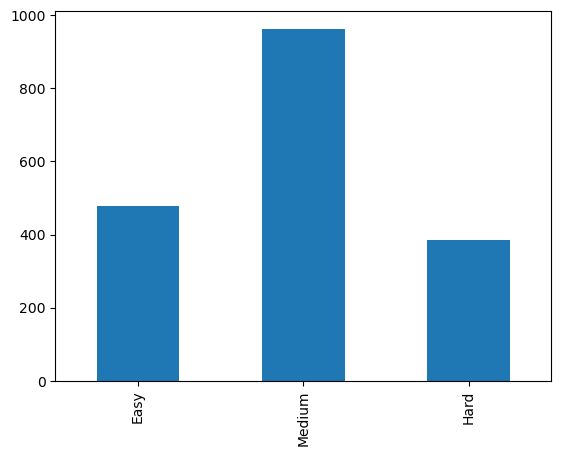

In [20]:
df1['difficulty'].value_counts()[['Easy', 'Medium', 'Hard']].plot(kind='bar')

<BarContainer object of 3 artists>

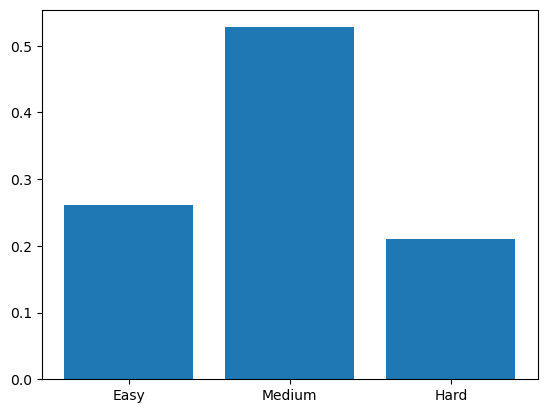

In [22]:
probabilities = []
probabilities.append((df1['difficulty'].value_counts()[['Easy']]/len(df1['difficulty'])))
probabilities[0] = probabilities[0]['Easy']
probabilities.append((df1['difficulty'].value_counts()[['Medium']]/len(df1['difficulty'])))
probabilities[1] = probabilities[1]['Medium']
probabilities.append((df1['difficulty'].value_counts()[['Hard']]/len(df1['difficulty'])))
probabilities[2] = probabilities[2]['Hard']
probabilities
plt.bar(['Easy', 'Medium', 'Hard'], probabilities)

<BarContainer object of 3 artists>

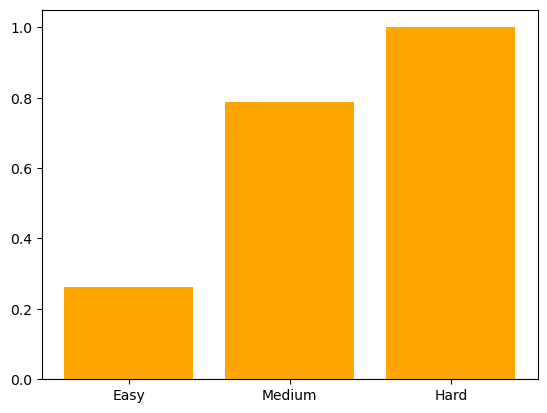

In [23]:
plt.bar(['Easy', 'Medium', 'Hard'], [probabilities[0], probabilities[0] + probabilities[1], sum(probabilities)], color='orange')

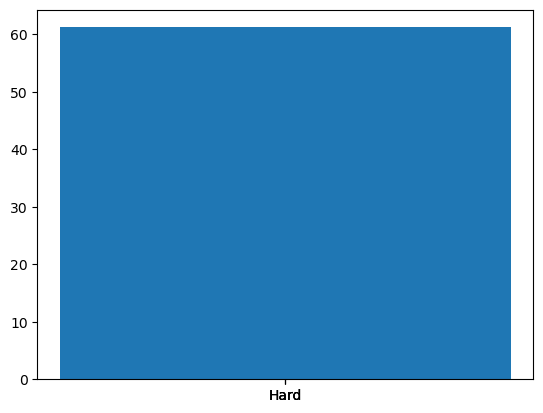

In [25]:
easy = []
medium = []
hard = []

for difficulty, acceptance in zip(df1['difficulty'], df1['acceptance_rate']):
    if difficulty == 'Easy':
        easy.append(acceptance)
    if difficulty == 'Medium':
        medium.append(acceptance)
    if difficulty == 'Hard':
        hard.append(acceptance)
acceptance_rate = {
    'Easy': (sum(easy)/len(easy)),
    'Medium': (sum(medium)/len(medium)),
    'Hard': (sum(hard)/len(hard))
}

names = list(acceptance_rate.keys())
values = list(acceptance_rate.values())

plt.bar(len(acceptance_rate), values, tick_label=names)
plt.show()

In [26]:
#Top 50 Companies Using LeetCode

def convert(x):
    try:
        return x.split(',')
    except AttributeError:
        return None


companies = []
for i in range(len(df1['companies'])):
    temp = convert(df1['companies'][i])
    if temp == None:
        continue
    for company in temp:
        if not(company in companies):
            companies.append(company)

probabilities = {}
for name, company in zip(df1['title'], df1['companies']):
    temp = convert(company)
    if temp == None:
        probabilities[name] = 0.0
    else:
        probabilities[name] = len(temp)/len(companies)

keys = list(probabilities.keys())
values = list(probabilities.values())
sorted_value_index = np.flip(np.argsort(values))
sorted_dict = {keys[i]:values[i] for i in sorted_value_index}

temp = {}

i = 0
for name in sorted_dict:
    temp[name] = sorted_dict[name]
    i += 1
    if i == 50:
        break;

# df_company=pd.DataFrame.from_dict(temp,orient ='index');
# df_company=df_company.sort_values(by=[0],ascending=False)
# df_company.plot.bar(figsize=(20, 5),title='Top 50 Questions Asked By Most Companies')

# plt.savefig('test.png', bbox_inches='tight')

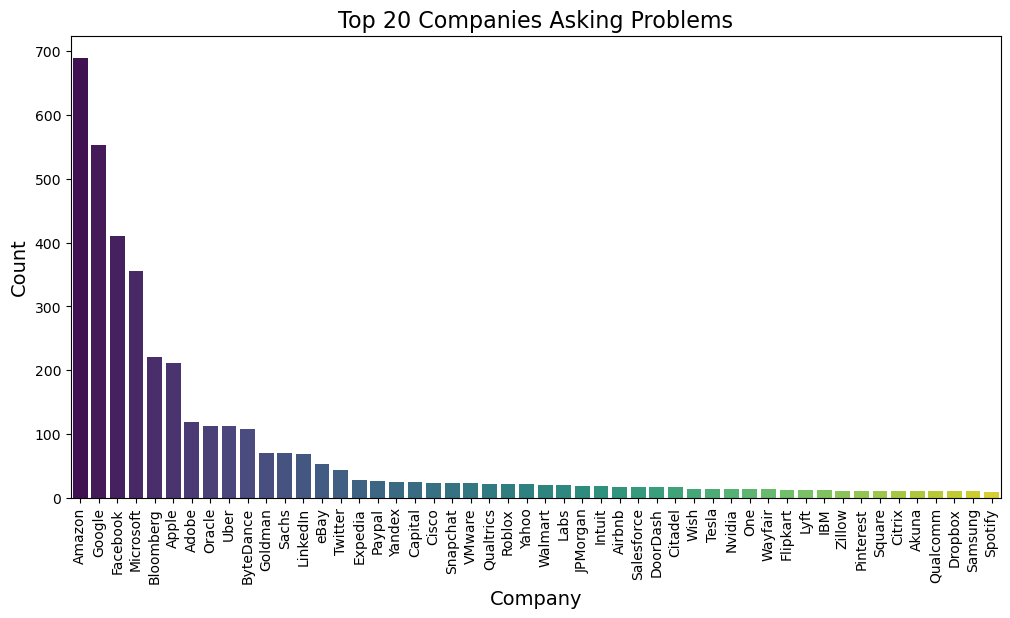

In [29]:
# Extract the company names and count their occurrences
company_count = {}
for companies1 in df1['companies']:
    if isinstance(companies1, float):
        continue
    for company1 in re.findall(r'\w+', companies1):
        company_count[company1] = company_count.get(company1, 0) + 1

# Create a DataFrame from the company count dictionary
company_data = pd.DataFrame.from_dict(company_count, orient='index', columns=['count']).reset_index()
company_data.columns = ['company', 'count']

# Sort companies by count and get the top 10
top_companies = company_data.sort_values(by='count', ascending=False).head(50)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='company', y='count', palette='viridis')
plt.title('Top 20 Companies Asking Problems', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)  # Rotate company names by 45 degrees
plt.savefig('top_companies.png', dpi=550)
plt.show()

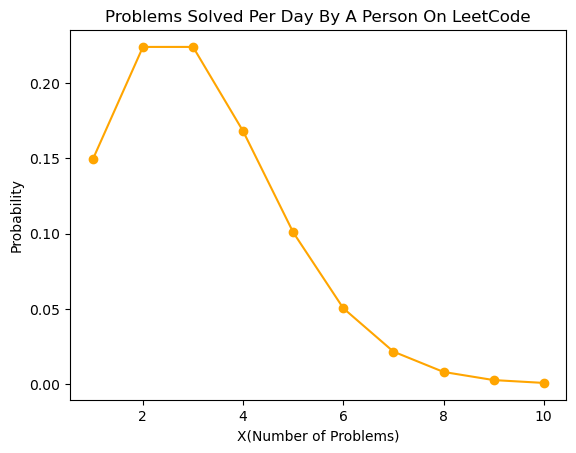

In [33]:
x = np.arange(1,11)
pmf = poisson.pmf(x, mu=3)
# pmf = np.round(pmf, 5)
plt.plot(x, pmf, marker='o', color='orange')
plt.xlabel('X(Number of Problems)')
plt.ylabel('Probability')
plt.title('Problems Solved Per Day By A Person On LeetCode')
# plt.show()
plt.savefig('test1.png', bbox_inches='tight')